In [1]:
using DynamicalSystems

In [2]:
using CairoMakie

In [3]:
function x_func(u, p)
    
    if u[1] <= 0
        return p[1] / ( 1 - u[1] ) + u[2]
    elseif u[1] > 0 && u[1] < p[1] + u[2] && u[3] <= 0
        return p[1] + u[2]
    else
        return -1
    end
    
end
function xi(x, xth)

    if x>(xth)
        return 1
    else
          return 0
    end
end

xi (generic function with 1 method)

## one element

In [4]:
function  rulkov_rule(u, p, t)
    
    α, σ, μ = p
    x, y, z = u
    
    xn = x_func(u, p)
    yn = y + μ * ( -x - 1 + σ )
    zn = x
    
    return SVector{3}(xn, yn, zn )
    
end

rulkov_rule (generic function with 1 method)

In [33]:
p = [4.6, -0.1, 0.001]
time = 50000
Ttr = 5000

5000

In [34]:
u0 = [0.0, 0.1, 0.0]
ds = DiscreteDynamicalSystem(rulkov_rule, u0, p)

3-dimensional discrete dynamical system
 state:       [0.0, 0.1, 0.0]
 rule f:      rulkov_rule
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [4.6, -0.1, 0.001]

In [35]:
tr = trajectory(ds, time)

3-dimensional Dataset{Float64} with 50001 points
  0.0       0.1         0.0
  4.7       0.0989      0.0
 -1.0       0.0931      4.7
  2.3931    0.093      -1.0
  4.693     0.0895069   2.3931
 -1.0       0.0837139   4.693
  2.38371   0.0836139  -1.0
  4.68361   0.0801302   2.38371
 -1.0       0.0743466   4.68361
  2.37435   0.0742466  -1.0
  4.67425   0.0707722   2.37435
 -1.0       0.064998    4.67425
  2.365     0.064898   -1.0
  ⋮                    
 -1.2325   -3.29131    -1.23415
 -1.23084  -3.29118    -1.2325
 -1.22918  -3.29105    -1.23084
 -1.22751  -3.29092    -1.22918
 -1.22584  -3.29079    -1.22751
 -1.22416  -3.29067    -1.22584
 -1.22247  -3.29054    -1.22416
 -1.22077  -3.29042    -1.22247
 -1.21907  -3.2903     -1.22077
 -1.21736  -3.29018    -1.21907
 -1.21565  -3.29006    -1.21736
 -1.21392  -3.28995    -1.21565

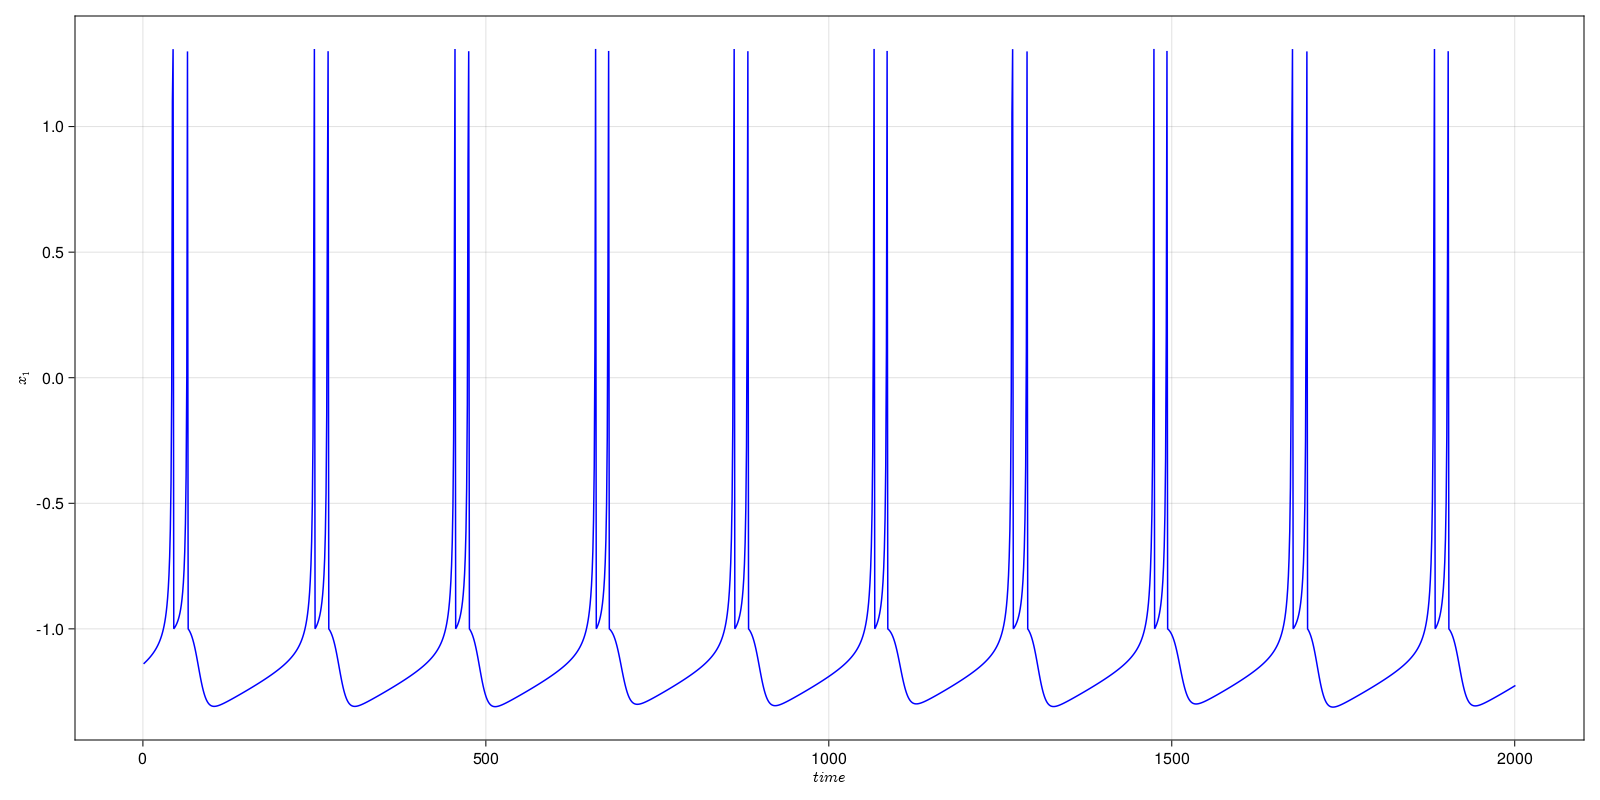

In [36]:
fig = Figure(resolution = (1600, 800))

ax1 = Axis(fig[1, 1], xlabel = L"time", ylabel = L"x_1")

lines!(ax1, columns(tr)[1][40000:42000], color = "blue")
fig

## two coupled

In [37]:
function  rulkov_two_coupled_rule(u, p, t)
    
    α, σ, μ, Βsyn, σsyn, xrp, xth, γ1, γ2, g1, g2, g_el  = p
    x1, y1, z1, x2, y2, z2, I12, I21 = u
    
    if g1 > 0 && g2 >0
        k = 2
    else
        k = 1
    end
    
    I21n = γ1 * I21 + g2 * (xrp - x1) * xi(x2, xth)
    I12n = γ2 * I12 + g1 * (xrp - x2) * xi(x1, xth)
    
    u1 = [ x1, y1 + Βsyn * I21n / k, z1 ]
    
    xn1 = x_func(u1, p)
    yn1 = y1 +μ * (-x1 - 1 + σ + σsyn * I21n / k + g_el * (x2 - x1) )
    zn1 = x1
    
    u2 = [ x2, y2 + Βsyn * I12n / k, z2 ]
    
    xn2 = x_func(u2, p)
    yn2 = y2 +μ * (-x2 - 1 + σ + σsyn * I21n / k + g_el * (x1 - x2))
    zn2 = x2
    
    return SVector{8}(xn1, yn1, zn1, xn2, yn2, zn2, I12n, I21n )
    
end

rulkov_two_coupled_rule (generic function with 1 method)

In [63]:
α = 4.6
σ = -0.1
μ = 0.001

Βsyn = 0.0001
σsyn = 1.0

xrp = -1.5
xth = -0.8

γ1 = 0.0
γ2 = 0.0

g1 = 0.8
g2 = 1.2
g_el = 0.0

I12 = I21 = 0

0

In [78]:
u0 = [0.1, 0.1, 0.1, 1, 1, 1,
        0.0, 0.0]

p = [α, σ, μ, Βsyn, σsyn, xrp, xth, γ1, γ2, g1, g2, g_el]

time = 500000
Ttr = 20000

20000

In [79]:
ds_coupled = DiscreteDynamicalSystem(rulkov_two_coupled_rule, u0, p)

8-dimensional discrete dynamical system
 state:       [0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 0.0, 0.0]
 rule f:      rulkov_two_coupled_rule
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [4.6, -0.1, 0.001, 0.0001, 1.0, …, 0.0, 0.0, 0.8, 1.2, 0.0]

In [80]:
tr = trajectory(ds_coupled, time)

8-dimensional Dataset{Float64} with 500001 points
  0.1       0.1         0.1       1.0      …   1.0       0.0       0.0
 -1.0       0.09784     0.1      -1.0          1.0      -2.0      -1.92
  2.39784   0.09774    -1.0       3.29694     -1.0      -0.0      -0.0
  4.69751   0.0919035   2.39784   5.59665      3.29694  -3.83755  -4.67741
 -1.0       0.0823874   4.69751  -1.0          5.59665  -5.67732  -7.43701
  2.38239   0.0822874  -1.0       3.27969  …  -1.0      -0.0      -0.0
  4.68205   0.0764756   2.38239   5.5794       3.27969  -3.82375  -4.65886
 -1.0       0.0669843   4.68205  -1.0          5.5794   -5.66352  -7.41847
  2.36698   0.0668843  -1.0       3.26249     -1.0      -0.0      -0.0
  4.66665   0.0610972   2.36698   5.5622       3.26249  -3.80999  -4.64038
 -1.0       0.0516305   4.66665  -1.0      …   5.5622   -5.64976  -7.39998
  2.35163   0.0515305  -1.0       3.24535     -1.0      -0.0      -0.0
  4.6513    0.0457679   2.35163   5.54506      3.24535  -3.79628  -4.6219

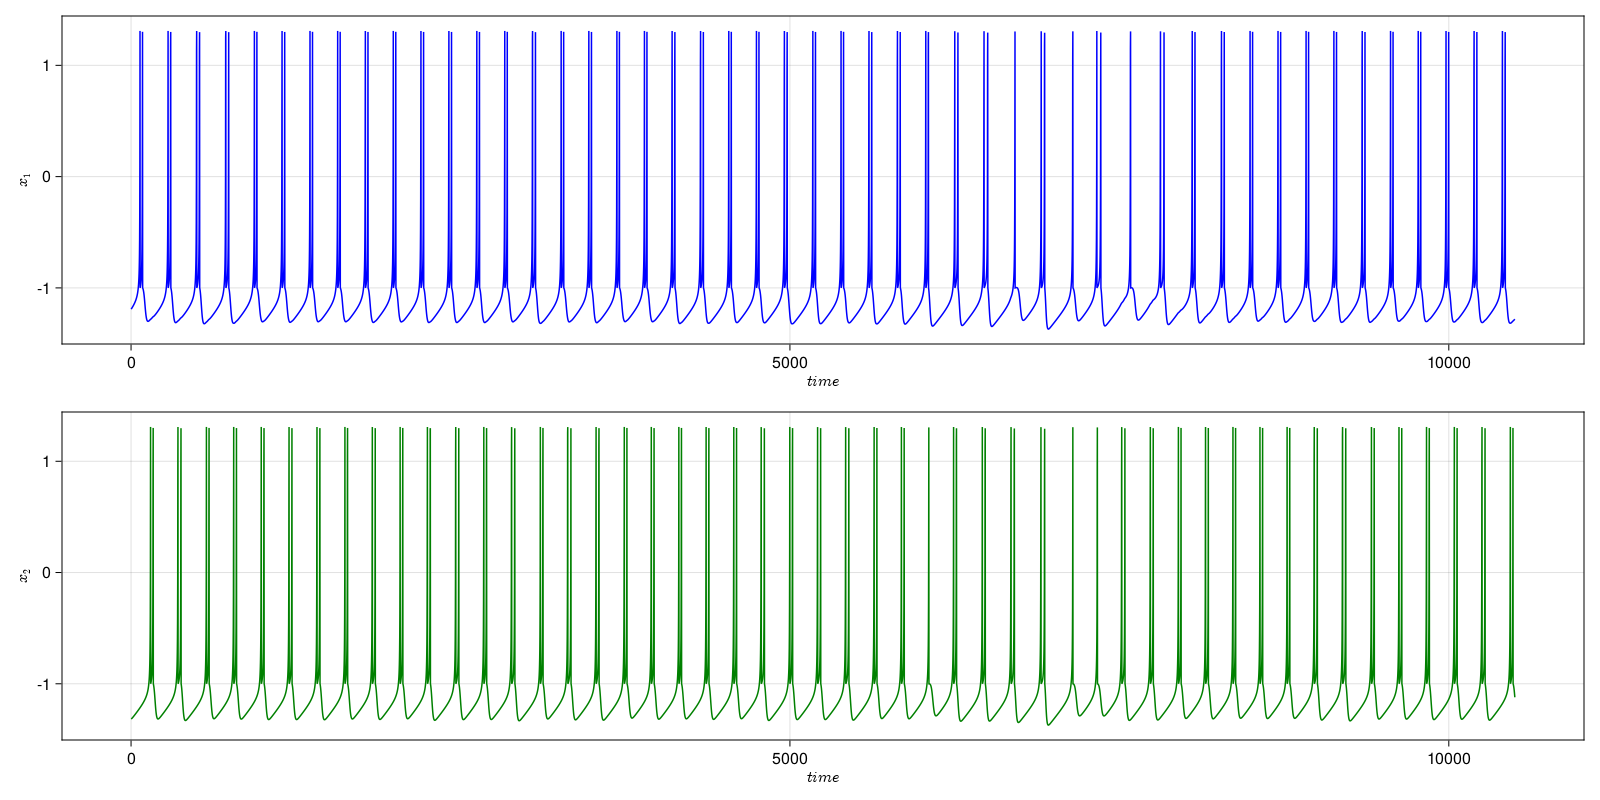

In [81]:
fig = Figure(resolution = (1600, 800))

ax1 = Axis(fig[1, 1], xlabel = L"time", ylabel = L"x_1")
ax2 = Axis(fig[2, 1], xlabel = L"time", ylabel = L"x_2")

lines!(ax1, columns(tr)[1][2000:12500], color = "blue")
lines!(ax2, columns(tr)[4][2000:12500], color = "green")
fig

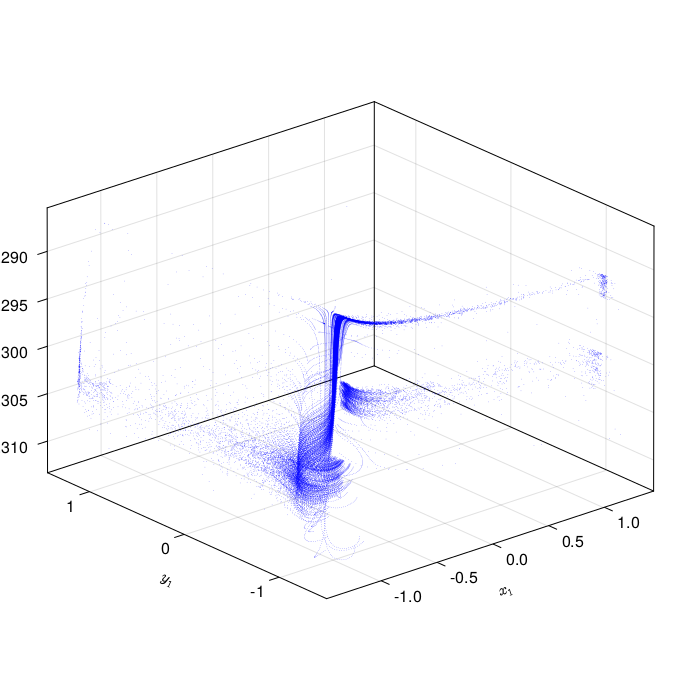

In [83]:
fig = Figure(resolution = (700, 700))

ax = Axis3(fig[1, 1], xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1")

ts, tf = 20000, 80000

scatter!(ax, columns(tr)[1][ts:tf],columns(tr)[4][ts:tf],columns(tr)[2][ts:tf], color = "blue", markersize = 0.5)
fig

## three coupled

In [84]:
function  rulkov_three_coupled_rule(u, p, t)
    
    α, σ, μ, Βsyn, σsyn, xrp, xth, γ1, γ2, g1, g2, g_el = p
    
    x1, y1, z1, x2, y2, z2, x3, y3, z3, I21, I31, I12, I32, I13, I23 = u
    
    
    if g1 > 0 && g2 >0
        k = 2
    else
        k = 1
    end
    
    I21n = γ2 * I21 + g2 * (xrp - x1) * xi(x2, xth)
    I31n = γ1 * I31 + g1 * (xrp - x1) * xi(x3, xth)
    
    I12n = γ1 * I12 + g1 * (xrp - x2) * xi(x1, xth)
    I32n = γ2 * I32 + g2 * (xrp - x2) * xi(x3, xth)
    
    I23n = γ1 * I23 + g1 * (xrp - x3) * xi(x2, xth)
    I13n = γ2 * I13 + g2 * (xrp - x3) * xi(x1, xth)
    
    u1 = [ x1, y1 + Βsyn * (I21n + I31n) / k, z1 ]
    
    xn1 = x_func(u1, p)
    yn1 = y1 +μ * (-x1 - 1 + σ + σsyn * (I21n + I31n) / k + g_el * (x2 - x1) + g_el * (x3 - x1) )
    zn1 = x1
    
    u2 = [ x2, y2 + Βsyn * (I12n + I32n) / k, z2 ]
    
    xn2 = x_func(u2, p)
    yn2 = y2 +μ * (-x2 - 1 + σ + σsyn * (I12n + I32n) / k + g_el * (x1 - x2) + g_el * (x3 - x2) )
    zn2 = x2
    
    u3 = [ x3, y3 + Βsyn * (I13n + I23n) / k, z3 ]
    
    xn3 = x_func(u3, p)
    yn3 = y3 +μ * (-x3 - 1 + σ + σsyn * (I13n + I23n) / k + g_el * (x1 - x3) + g_el * (x2 - x3) )
    zn3 = x3
    
    return SVector{15}(xn1, yn1, zn1, xn2, yn2, zn2, xn3, yn3, zn3,
                        I21n, I31n, I12n, I32n, I13n, I23n)
    
end

rulkov_three_coupled_rule (generic function with 1 method)

In [99]:
α = 3.9
σ = 1.0
μ = 0.001

Βsyn = 0.0001
σsyn = 1.0

xrp = -1.5
xth = -0.8

γ1 = 0.0
γ2 = 0.0

g1 = 1.0
g2 = 7.0
g_el = 0.0

I21 = I31 = I12 = I32 = I13 = I23 = 0

0

In [100]:
u0 = [0.1, 0.1, 0.1,
    0.0, 0.0, 0.0,
    0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

p = [α, σ, μ, Βsyn, σsyn, xrp, xth, γ1, γ2, g1, g2, g_el]

time = 500000
Ttr = 50000

50000

In [101]:
ds_coupled3 = DiscreteDynamicalSystem(rulkov_three_coupled_rule, u0, p)

15-dimensional discrete dynamical system
 state:       [0.1, 0.1, 0.1, 0.0, 0.0, 0.0, …, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 rule f:      rulkov_three_coupled_rule
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [3.9, 1.0, 0.001, 0.0001, 1.0, -1.5, …, 0.0, 0.0, 1.0, 7.0, 0.0]

In [102]:
tr = trajectory(ds_coupled3, time)

15-dimensional Dataset{Float64} with 500001 points
  0.1        0.1          0.1       …    0.0       0.0       0.0
 -1.0        0.0935       0.1          -10.5     -10.5      -1.5
  2.0433     0.0925      -1.0          -37.7958   -0.0      -5.3994
  3.9925     0.0904567    2.0433        -0.0      -3.5      -0.0
 -1.0        0.0644942    3.9925       -23.9482  -24.0606   -3.43723
  2.01429    0.0634942   -1.0       …  -37.5941   -0.0      -5.38528
  3.96349    0.0614799    2.01429       -0.0      -3.5      -0.0
 -1.0        0.0356624    3.96349      -23.6856  -23.8995   -3.41421
  1.98546    0.0346624   -1.0          -37.3315   -0.0      -5.36227
  3.93466    0.032677     1.98546       -0.0      -3.5      -0.0
 -1.0        0.00700366   3.93466   …  -23.4254  -23.7394   -3.39135
  1.9568     0.00600366  -1.0          -37.0715   -0.0      -5.33942
  3.906      0.00404686   1.9568        -0.0      -3.5      -0.0
  ⋮                                 ⋱                       
 -0.92307   -2.9

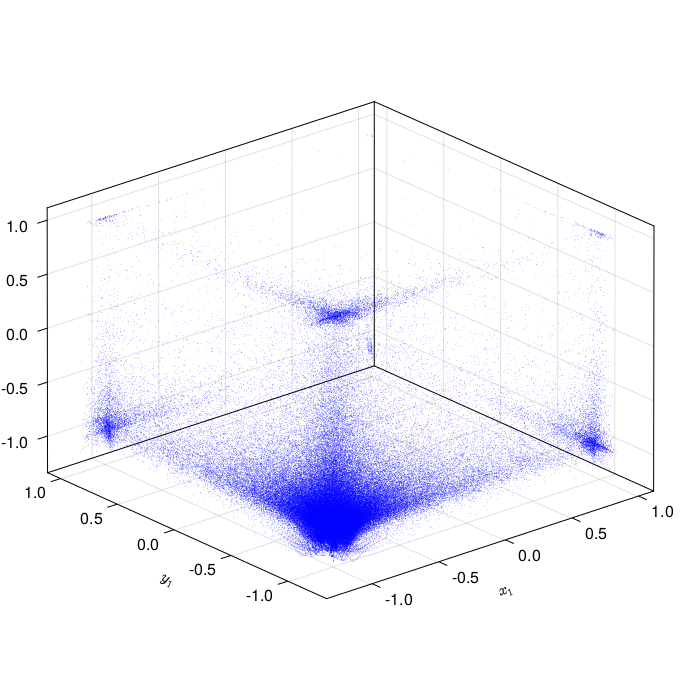

In [104]:
fig = Figure(resolution = (700, 700))

ax = Axis3(fig[1, 1], xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1")

ts, tf = 20000, 200000

scatter!(ax, columns(tr)[1][ts:tf],columns(tr)[4][ts:tf],columns(tr)[7][ts:tf], color = "blue", markersize = 0.5)
fig

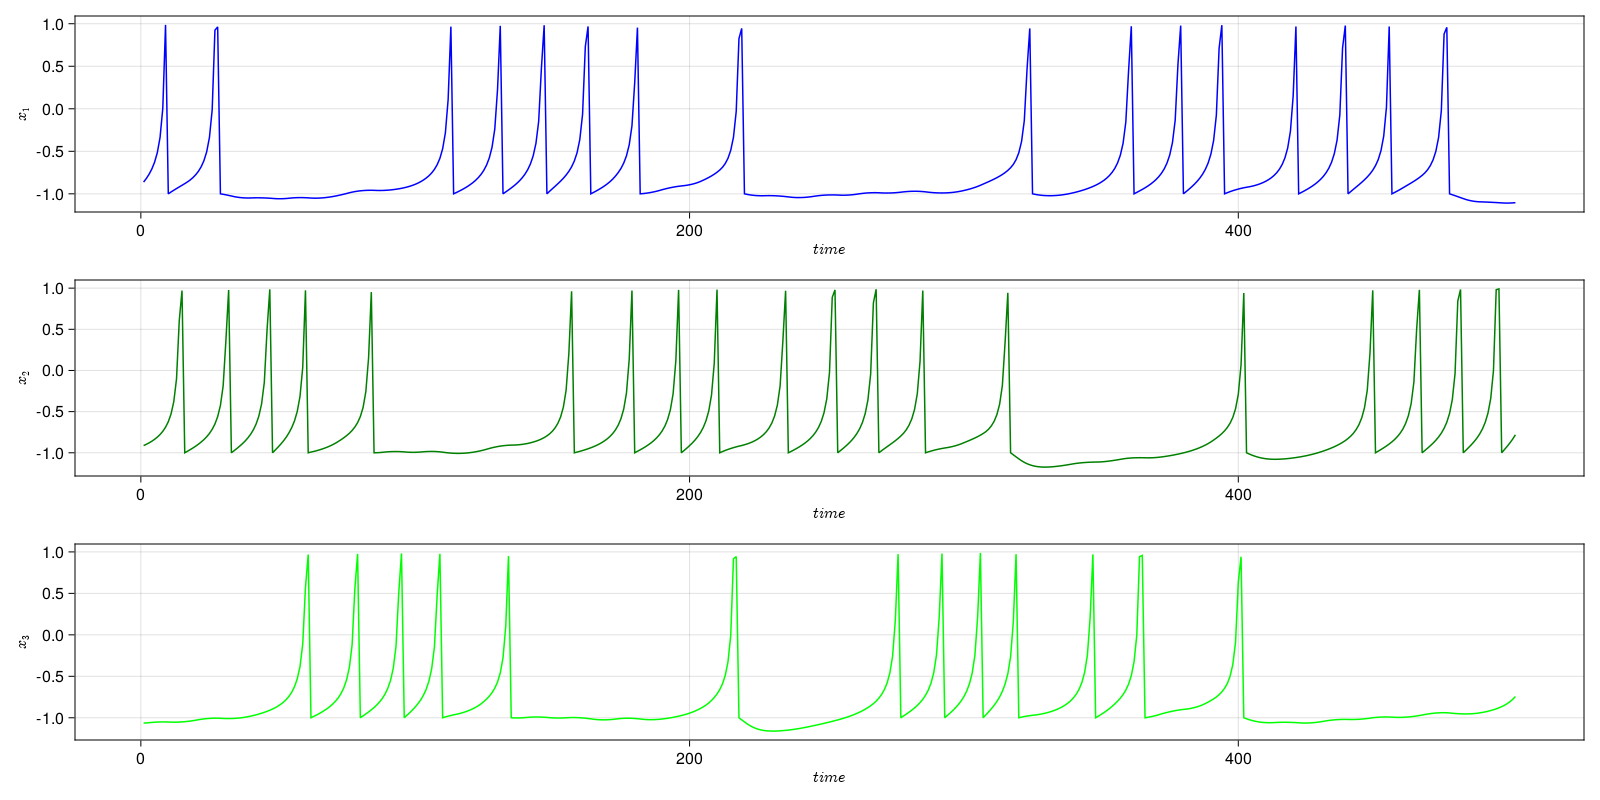

In [109]:
fig = Figure(resolution = (1600, 800))

ax1 = Axis(fig[1, 1], xlabel = L"time", ylabel = L"x_1")
ax2 = Axis(fig[2, 1], xlabel = L"time", ylabel = L"x_2")
ax3 = Axis(fig[3, 1], xlabel = L"time", ylabel = L"x_3")

lines!(ax1, columns(tr)[1][2000:2500], color = "blue")
lines!(ax2, columns(tr)[4][2000:2500], color = "green")
lines!(ax3, columns(tr)[7][2000:2500], color = "lime")
fig